**THE SPARKS FOUNDATION - PREDICTION USING DECISION TREE ALGORITHM**



*AUTHOR : MOHIT GUPTA*

**STEP 1 - ADDING DATASET AND GLIMPSE OF DATA**

In [291]:
import sklearn.datasets as datasets
import pandas as pd

dataset = pd.read_csv("/content/Iris.csv") 
dataset = pd.DataFrame(dataset)
print("SHAPE OF OUR DATASET:" , dataset.shape)



dataset = dataset.set_index('Id')  #data-cleaning
print(dataset.head())# how data looks

feature_names = dataset.drop(["Species"],axis = 1).columns

print("FEATURE NAMES :",feature_names)
dataset.groupby("Species").count()                             # we have 50 samples of each class


SHAPE OF OUR DATASET: (150, 6)
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa
FEATURE NAMES : Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


**STEP2 - SPLITTING DATA AND DATA-ENGINEERING**

In [292]:
#data-split and features-scaling


from sklearn.model_selection import train_test_split as split
train_data,test_data = split(dataset,random_state = 7,test_size = 0.3)   #test:train= 3:7
print("SIZE OF TRAIN_DATA:" ,train_data.shape)
print("SIZE OF TEST_DATA:",test_data.shape)
train_target = train_data["Species"]
test_target = test_data["Species"]
train_input = train_data.drop(["Species"],axis = 1)
test_input = test_data.drop(["Species"],axis = 1)

dataset.describe() # we can look there is no missing data the count is 150 for each,in opposite case we FILL or DROP NA values by IMPUTION or other means



SIZE OF TRAIN_DATA: (105, 5)
SIZE OF TEST_DATA: (45, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**STEP3-USING SKLEARN PACKAGE AND DECISIONTREECLASSIFIER FOR MODEL**

In [293]:

#preparing model and evaluation
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix as matrix
from sklearn.metrics import accuracy_score as score
dtree_model = DecisionTreeClassifier(max_depth = 5,max_features = 4).fit(train_input, train_target) # model-prediction is accurate at max_depth = 6
dtree_predictions = dtree_model.predict(test_input) 

  
# creating a confusion matrix and accuracy

scores = score(test_target, dtree_predictions) 
cm = matrix(test_target,dtree_predictions)
print("ACCURACY FOR MODEL:",scores)
print(cm)

ACCURACY FOR MODEL: 0.8666666666666667
[[12  0  0]
 [ 0 12  4]
 [ 0  2 15]]


**ABOVE WE HAVE PREDICTED AND EVALUATED OUR MODEL**

**VISUALISING FEATURES' IMPORTANCE**

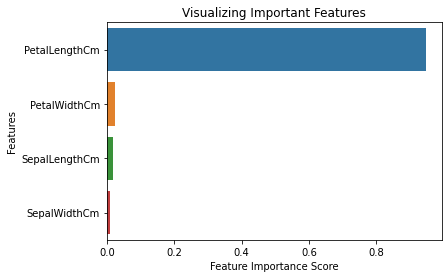

In [294]:
#visualising
features = train_input.columns
feature_imp = pd.Series(dtree_model.feature_importances_,index = features).sort_values(ascending = False) # using method feature_importances 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()


**WE CAN TUNE HYPERPARAMETERS FOR BETTER RESULTS AND HERE IS THE HYPOTHESIS IN A GRAPHICAL REPRESENTATION**

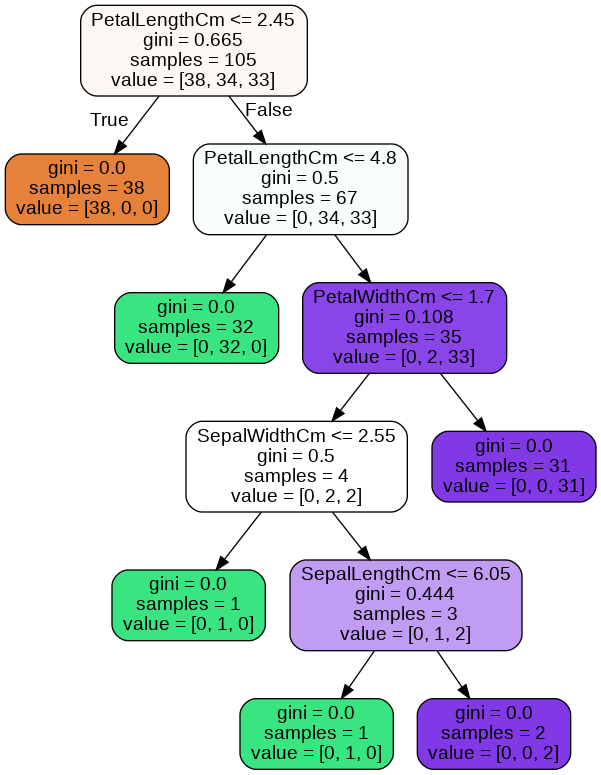

In [295]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree_model, out_file=dot_data, feature_names= features,  
                filled=True, rounded=True
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**AN ALTERNATIVE TO DECISIONTREECLASSIFIER - RANDOMFORESTCLASSIFIER**

In [296]:

#preparing model and evaluation
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix as matrix
from sklearn.metrics import accuracy_score as score
dtree_model = RandomForestClassifier(max_depth = 4 , n_estimators = 20,max_features = 4).fit(train_input, train_target) # for max_features = 2 and n_estmators = 20(WE GET MAX ACCURACY)
dtree_predictions = dtree_model.predict(test_input) 

  
# creating a confusion matrix and accuracy

scores = score(test_target, dtree_predictions) 
cm = matrix(test_target,dtree_predictions)
print("ACCURACY FOR MODEL:",scores)
print(cm)

ACCURACY FOR MODEL: 0.9111111111111111
[[12  0  0]
 [ 0 14  2]
 [ 0  2 15]]


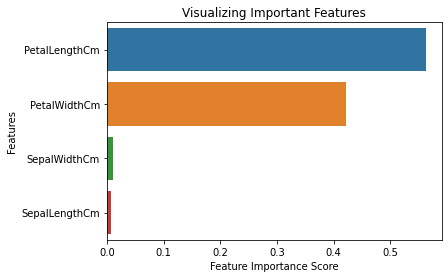

In [297]:
#visualising
features = train_input.columns
feature_imp = pd.Series(dtree_model.feature_importances_,index = features).sort_values(ascending = False) # using method feature_importances 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()


**->>WE CAN OBSERVE THE CHANGES, RANDOMFORESTCLASSIFIER IS MORE ACCUARTE.**